# Unsupervised Learning: Dimensionality Reduction and Visualization

Previously we worked on visualizing the iris data by plotting
pairs of dimensions by trial and error, until we arrived at
the best pair of dimensions for our dataset.  Here we will
use an unsupervised *dimensionality reduction* algorithm
to accomplish this more automatically.

By the end of this section you will

- Know how to instantiate and train an unsupervised dimensionality reduction algorithm:
  Principal Component Analysis (PCA)
- Know how to use PCA to visualize high-dimensional data

## The Math of PCA ###

We start with PCA in 2D, which is convinient because we can plot everything. Performing PCA in 2D corrsponds to identifying the rotation 
and scaling of the data so that the coordinates become uncorrelated with variance of 1 each.

The matrix that describes a 2D rotation around the origin with angle $\theta$ is

<img src="files/Rotation_matrix.jpg"/ width=800>

In [50]:
from random import uniform
import numpy as np
from numpy.linalg import norm
import math
from math import cos,sin
import matplotlib.pyplot as plt
%matplotlib inline

### Prepare data
Data is generated as uniform over an ellipse

rotation matrix=
[[ 0.87758256 -0.47942554]
 [ 0.47942554  0.87758256]]
scaling factors= [[ 1.   0.1]]


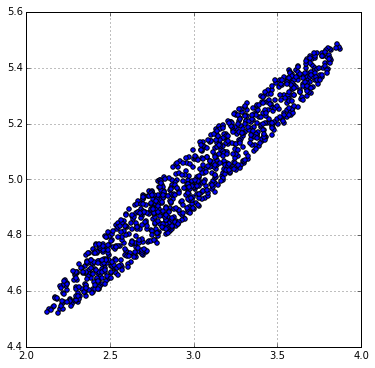

In [67]:
n=1000
i=0
shift=np.matrix([[3],[5]])
theta=0.5
rotation=np.matrix([[cos(theta),-sin(theta)],[sin(theta),cos(theta)]])
scale=np.matrix([1,0.1]).transpose()
print 'rotation matrix=\n',rotation
print 'scaling factors=',scale.transpose()

X=np.zeros([2,n])
while i<n:
    p=np.matrix([uniform(-1,1),uniform(-1,1)]).transpose()
    if norm(p)<1:
        p=rotation*np.multiply(p,scale)
        X[:,i]=np.squeeze(np.asarray(p+shift))
        i+=1

plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X[0,:],X[1,:])
plt.grid()

### Subtract mean

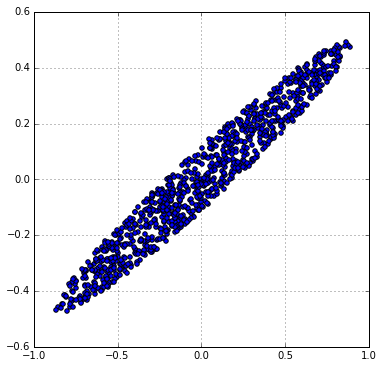

In [69]:
M=np.mean(X,axis=1)
for i in range(n):
    X[:,i]=X[:,i]-M[:]

plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X[0,:]-M[0],X[1,:]-M[1])
plt.grid()

##Normalizing 2D data using PCA##
For more documentation on sklearn.decomposition.PCA see http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [70]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X.transpose())
V=pca.components_ 
print 'eigenvectors=\n',V
print 'rotation matrix=\n',rotation
print 'Product=\n',V*rotation

eigenvectors=
[[ 0.87777049  0.47908138]
 [-0.47908138  0.87777049]]
rotation matrix=
[[ 0.87758256 -0.47942554]
 [ 0.47942554  0.87758256]]
Product=
[[  9.99999923e-01  -3.92128038e-04]
 [  3.92128038e-04   9.99999923e-01]]


###Rotate data to eigen-vectors

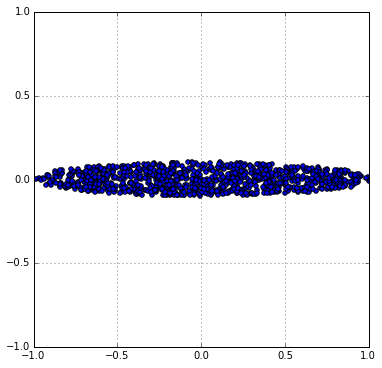

In [71]:
Xt=np.dot(V,X)

plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(Xt[0,:],Xt[1,:])
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.grid()

### Scale data to make it spherical

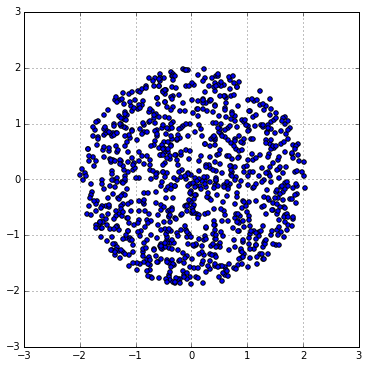

In [72]:
std=[math.sqrt(x) for x in pca.explained_variance_]
Xw=np.array(Xt)
Xw[0,:]=Xt[0,:]/std[0]
Xw[1,:]=Xt[1,:]/std[1]

plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(Xw[0,:],Xw[1,:])
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.grid()

## Dimensionality Reduction: PCA

Dimensionality reduction is the task of deriving a set of new
artificial features that is smaller than the original feature
set while retaining most of the variance of the original data.
Here we'll use a common but powerful dimensionality reduction
technique called Principal Component Analysis (PCA).
We'll perform PCA on the iris dataset that we saw before:

In [74]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
print np.shape(X),np.shape(y)

(150, 4) (150,)


PCA is performed using linear combinations of the original features
using a truncated Singular Value Decomposition of the matrix X so
as to project the data onto a base of the top singular vectors.
If the number of retained components is 2 or 3, PCA can be used
to visualize the dataset.

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

PCA(copy=True, n_components=2, whiten=True)

Once fitted, the pca model exposes the singular vectors in the components_ attribute:

In [76]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [-0.65653988, -0.72971237,  0.1757674 ,  0.07470647]])

Other attributes are available as well:

In [77]:
pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557])

In [78]:
pca.explained_variance_ratio_.sum()

0.97763177502480336

Let us project the iris dataset along those first two dimensions:

In [82]:
X_pca = pca.transform(X)
print np.shape(X), np.shape(X_pca)

(150, 4) (150, 2)


PCA `normalizes` and `whitens` the data, which means that the data
is now centered on both components with unit variance:

In [83]:
import numpy as np
np.round(X_pca.mean(axis=0), decimals=5)

array([-0.,  0.])

In [84]:
np.round(X_pca.std(axis=0), decimals=5)

array([ 1.,  1.])

Furthermore, the samples components do no longer carry any linear correlation:

In [85]:
np.corrcoef(X_pca.T)

array([[  1.00000000e+00,  -4.97379915e-16],
       [ -4.97379915e-16,   1.00000000e+00]])

### We can visualize the projection using pylab

In [88]:
import pylab as pl
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    pl.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        pl.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    pl.legend()

Now calling this function for our data, we see the plot:

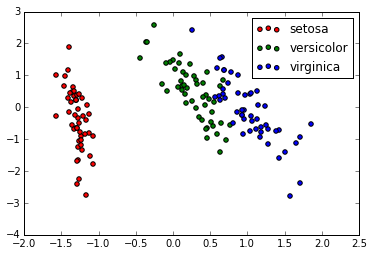

In [89]:
plot_PCA_2D(X_pca, iris.target, iris.target_names)

Note that this projection was determined *without* any information about the
labels (represented by the colors): this is the sense in which the learning
is **unsupervised**.  Nevertheless, we see that the projection gives us insight
into the distribution of the different flowers in parameter space: notably,
*iris setosa* is much more distinct than the other two species.

Note also that the default implementation of PCA computes the
singular value decomposition (SVD) of the full
data matrix, which is not scalable when both ``n_samples`` and
``n_features`` are big (more that a few thousands).
If you are interested in a number of components that is much
smaller than both ``n_samples`` and ``n_features``, consider using
`sklearn.decomposition.RandomizedPCA` instead.

Other dimensionality reduction techniques which are useful to know about:

- `sklearn.decomposition.PCA`: <br/>
   Principal Component Analysis
- `sklearn.decomposition.RandomizedPCA`:<br/>
   fast non-exact PCA implementation based on a randomized algorithm
- `sklearn.decomposition.SparsePCA`:<br/>
   PCA variant including L1 penalty for sparsity
- `sklearn.decomposition.FastICA`:<br/>
   Independent Component Analysis
- `sklearn.decomposition.NMF`:<br/>
   non-negative matrix factorization
- `sklearn.manifold.LocallyLinearEmbedding`: <br/>
   nonlinear manifold learning technique based on local neighborhood geometry
- `sklearn.manifold.IsoMap`: <br/>
   nonlinear manifold learning technique based on a sparse graph algorithm

## Exercise:

Repeat the above dimensionality reduction with
``sklearn.decomposition.RandomizedPCA``.

You can re-use the ``plot_PCA_2D`` function from above.
Are the results similar to those from standard PCA?